In [14]:
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [15]:
weight_time = 1
def distance(p1,p2):
    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2*weight_time)**0.5

0 23
[[-7, 36], [11, 45], [-12, -39], [50, -48], [-27, 11]]
[[1, 28, 2.608695652173913, [20, 23]], [20, -47, 2.869565217391304, [22, 25]], [-33, -41, 0.391304347826087, [9, 10]], [18, -8, 1.0434782608695652, [12, 14]], [-37, 10, 3.130434782608696, [24, 27]], [-48, -6, 0.782608695652174, [9, 11]], [-45, 16, 0.43478260869565216, [5, 7]], [6, 33, 0.0, [0, 1]], [7, 1, 0.30434782608695654, [7, 8]], [41, -28, 0.13043478260869565, [1, 4]], [29, 7, 1.1304347826086956, [13, 15]], [42, -42, 0.34782608695652173, [4, 6]], [12, -46, 1.3043478260869565, [10, 13]], [-25, -7, 1.826086956521739, [21, 23]], [-35, -41, 2.608695652173913, [20, 23]], [28, 38, 0.5217391304347826, [4, 7]], [43, -17, 2.217391304347826, [17, 20]], [-43, -2, 0.043478260869565216, [1, 2]], [-31, -1, 0.782608695652174, [9, 11]], [3, -8, 1.0434782608695652, [12, 14]]]


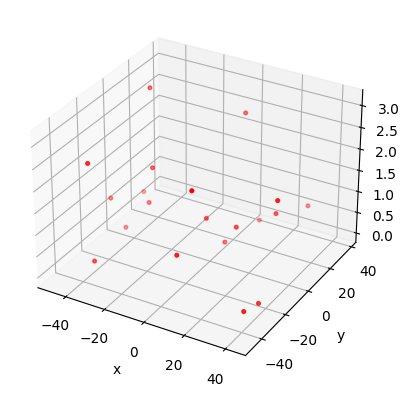

In [40]:
# 生成初始类聚中心
points = []
for i in range(5):
    points.append([random.randint(-50,50),random.randint(-50,50)])
# 生成居民
peoples = []
early_a= 24
later_a=0

for i in range(20):
    early = random.randint(0,25) # 最早服务时间
    if early<early_a:
        early_a=early
    long = random.randint(1,3) # 服务间隔时长
    if early+long<=24:
        if early+long>later_a:
            later_a = early+long
    else:
        if early+long-24>later_a:
            later_a = early+long-24
        
    peoples.append([random.randint(-50,50),random.randint(-50,50), [early, early+long]])
for i in peoples:
    i.insert(2,i[2][0]*(i[2][1]-i[2][0])/(later_a-early_a))# 计算时间坐标
    # i[2].append()
print(early_a,later_a)
print(points)
print(peoples)

x = [i[0] for i in peoples]
y = [i[1] for i in peoples]
z = [i[2] for i in peoples]
p = plt.subplot(projection = '3d')
p.scatter(x,y,z, c="r", s=7)
p.set(xlabel='x', ylabel='y',zlabel='z')
p.viewLim()
plt.show()

    

In [49]:
cluster = KMeans(n_clusters=3, random_state=0).fit([i[:2] for i in peoples])
print(cluster.cluster_centers_)

[[ 31.6        -36.        ]
 [-37.125       -9.        ]
 [ 13.14285714  13.        ]]


d:\app\code\code_miniconda\envs\nlp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
X, y = make_blobs(n_samples=500, # 500个样本
                 n_features=3, # 每个样本2个特征
                 centers=4, # 4个中心
                 random_state=1 #控制随机性
                 )
print(X)
print(y)

[[ -1.12920444   3.71482912 -10.39446603]
 [  2.06732805  -1.5362701    5.01728542]
 [ -5.90545383  -8.46721133  -7.70210517]
 ...
 [ -4.95351774  -6.01988777  -7.54471341]
 [ -4.4309294   -7.03888219  -9.50192455]
 [ -2.4450939    2.65056423  -9.28292291]]
[0 3 1 0 0 0 0 0 3 1 1 3 2 2 3 3 1 0 0 1 3 0 0 1 3 3 2 1 0 3 1 3 2 0 1 2 0
 0 1 2 2 0 3 1 0 2 0 3 0 0 1 3 3 3 0 1 3 1 1 3 2 3 0 3 1 0 0 1 0 2 3 2 3 1
 1 3 3 0 1 3 1 1 1 2 2 2 3 3 1 2 3 0 2 2 3 3 2 0 0 2 0 1 1 2 2 3 1 0 3 2 1
 3 1 1 0 1 0 1 1 2 3 1 3 2 0 1 1 1 1 1 1 3 1 1 3 2 1 1 3 0 2 0 2 1 1 2 0 2
 1 3 1 0 3 2 1 1 3 2 1 3 3 2 3 2 3 1 3 2 0 0 3 3 2 0 3 3 0 3 0 0 0 1 1 0 3
 2 0 1 0 3 2 2 3 0 0 3 3 3 0 2 2 2 3 2 0 0 1 0 1 3 0 1 3 2 2 0 2 2 3 3 1 1
 0 2 1 1 3 0 3 1 3 1 3 1 1 0 1 1 2 1 2 3 1 0 0 2 1 0 1 1 3 0 2 2 2 2 0 1 2
 1 0 2 0 2 0 3 1 0 2 3 1 0 2 1 2 2 3 3 0 3 1 1 1 2 2 0 1 0 0 3 3 2 2 1 1 2
 0 3 2 0 3 3 0 3 1 1 2 2 0 2 2 0 0 1 1 2 1 0 0 2 0 2 0 2 2 0 0 0 2 1 0 3 0
 3 3 2 2 1 3 1 0 2 2 0 2 2 0 2 1 3 1 1 2 0 3 1 1 2 3 0 1 3 3 0 0 1 

In [10]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,